<a href="https://colab.research.google.com/github/emms204/The-Best-Classifier/blob/main/The_Best_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
sns.set()
%matplotlib inline

In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-01-24 20:34:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2022-01-24 20:35:00 (1.23 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [4]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-01-24 20:35:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-01-24 20:35:21 (824 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Data From CSV File


In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [7]:
df.shape

(346, 10)

### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


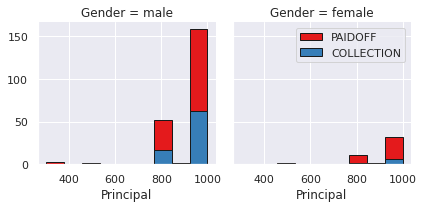

In [10]:
#import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

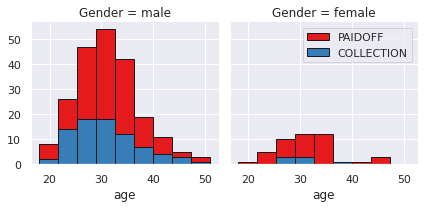

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


In [13]:
df.select_dtypes(include="object").columns

Index(['loan_status', 'education', 'Gender'], dtype='object')

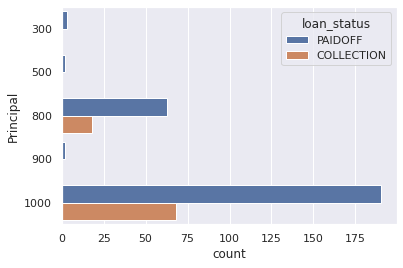

In [14]:
sns.countplot(y='Principal', hue='loan_status', data=df)

This shows us that people who borrow $1000 76% pay back and 23% have a higher chance of not paying back

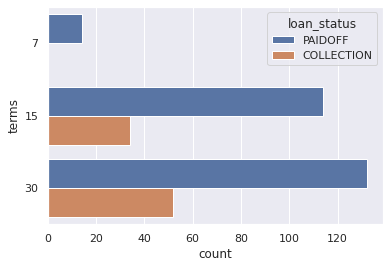

In [15]:
ax = sns.countplot(y='terms', hue='loan_status', data=df)

This shows us that people with a term period of 30 days 75% pay back and 25% have a higher chance of not paying back

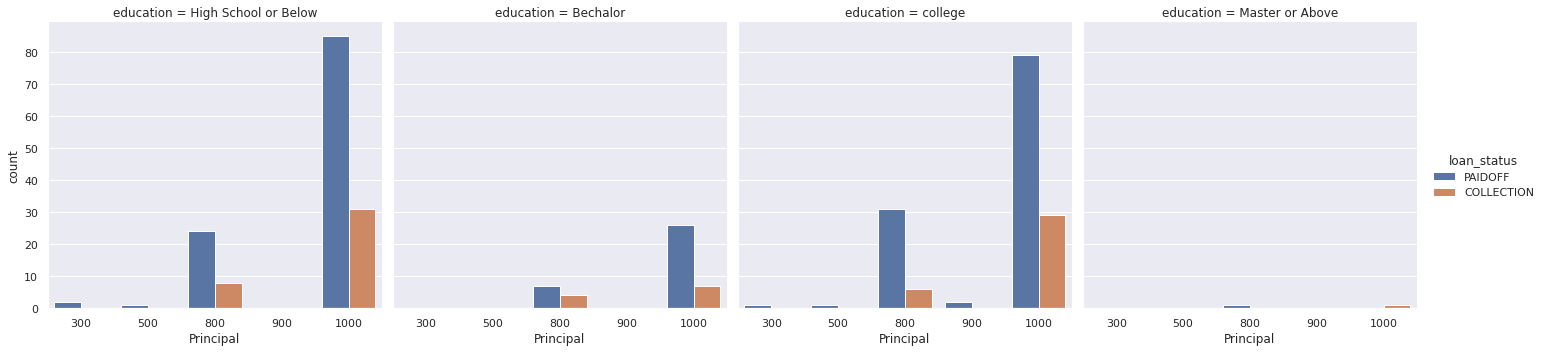

In [16]:
ax = sns.catplot(x="Principal",hue="loan_status",col="education",
                 data=df, kind="count")

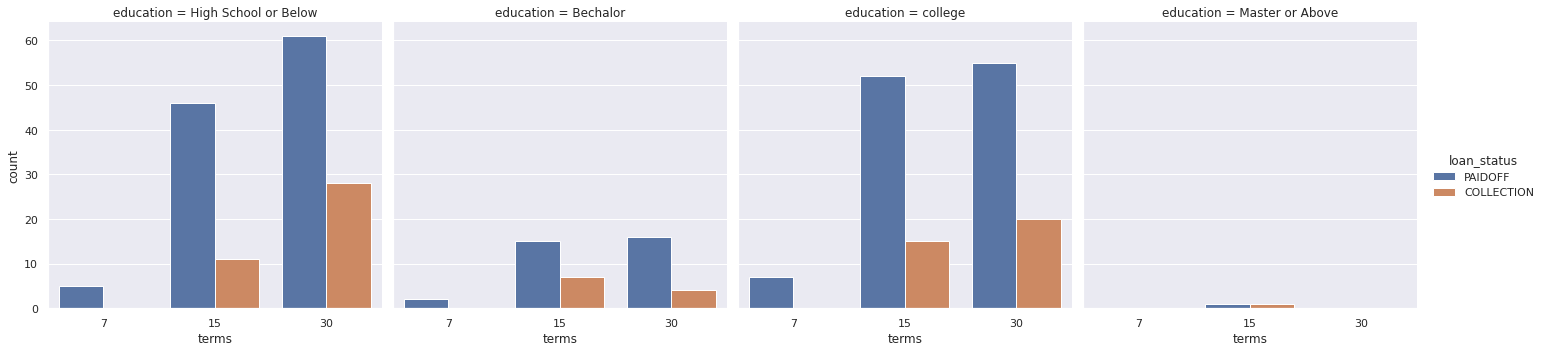

In [17]:
ax = sns.catplot(x="terms",hue="loan_status",col="education",
                 data=df, kind="count")

This shows that 69% of high school students and below with terms of 30 days will pay back and 30% might not pay back and also 73% of College students will pay back and 27% of College Students might not pay back


In [18]:
df['age_bin'] = pd.cut(df.age, bins=5, labels=False)
test_df['age_bin'] = pd.cut(df.age, bins=5, labels=False)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_bin
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,4
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,1
...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,2
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,3
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,1


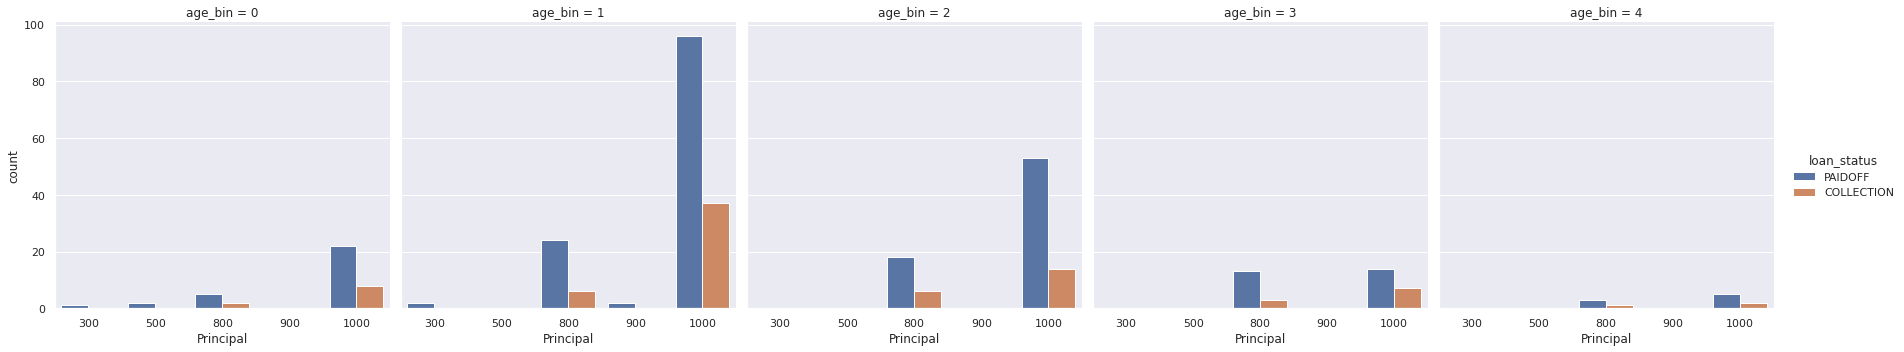

In [20]:
ax = sns.catplot(x="Principal",hue="loan_status",col="age_bin",
                 data=df, kind="count")

This shows that the age range 24.6 - 31.2 borrow loan more and have a higher chance of not paying back

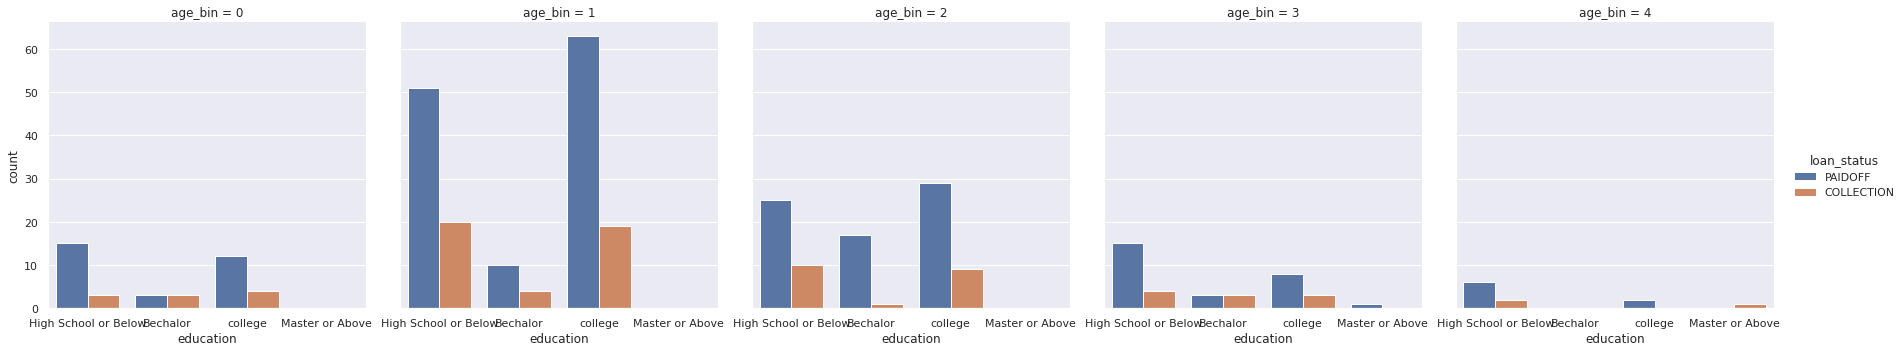

In [21]:
ax = sns.catplot(x="education",hue="loan_status",col="age_bin",
                 data=df, kind="count")

In [22]:
#@title We have learnt that A Person with a high school degree or Below within the age range of 25 - 31 who borrrows a principal of $1000 within the terms of 30 days is most likely not going to pay back the loan { run: "auto", display-mode: "form" }

In [23]:
#@title A Person with a College degree within the age range of 25 - 31 who borrows a principal of $1000 within the terms of 30 days is most likely to pay back { display-mode: "form" }

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


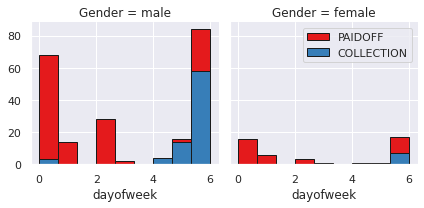

In [24]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


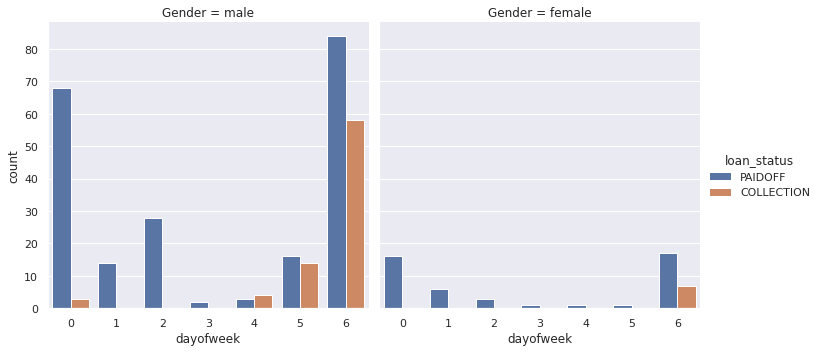

In [25]:
ax = sns.catplot(x="dayofweek",hue="loan_status",col="Gender",
                 data=df, kind="count")

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [26]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_bin,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,4,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,2,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,1,4,1


In [27]:
df.groupby(['loan_status','age_bin']).count()

Unnamed: 0  Unnamed: 0.1  ...  dayofweek  weekend
loan_status age_bin                            ...                    
COLLECTION  0                10            10  ...         10       10
            1                43            43  ...         43       43
            2                20            20  ...         20       20
            3                10            10  ...         10       10
            4                 3             3  ...          3        3
PAIDOFF     0                30            30  ...         30       30
            1               124           124  ...        124      124
            2                71            71  ...         71       71
            3                27            27  ...         27       27
            4                 8             8  ...          8        8

[10 rows x 11 columns]

## Convert Categorical features to numerical values


Let's look at gender:


In [28]:
le = LabelEncoder()

In [29]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [30]:
df['Gender'] = le.fit_transform(df.Gender)
test_df['Gender'] = le.fit_transform(test_df.Gender)
df['education'] = le.fit_transform(df['education'])
test_df['education'] = le.fit_transform(test_df['education'])
#.replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_bin,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,1,1,4,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,0,0,2,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,3,1,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,3,0,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,3,1,1,4,1


## One Hot Encoding

#### How about education?


In [31]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education  loan_status
0          PAIDOFF        0.750000
           COLLECTION     0.250000
1          PAIDOFF        0.741722
           COLLECTION     0.258278
2          COLLECTION     0.500000
           PAIDOFF        0.500000
3          PAIDOFF        0.765101
           COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [32]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,age_bin,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,1,1,4,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,0,0,2,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,3,1,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,3,0,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,3,1,1,4,1


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [33]:
Feature = df[['Principal','terms','age_bin','Gender','weekend','education','dayofweek']].copy()
test_Feature = test_df[['Principal','terms','age_bin','Gender','weekend','education','dayofweek']].copy()
#pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age_bin,Gender,weekend,education,dayofweek
0,1000,30,4,1,0,1,3
1,1000,30,2,0,0,0,3
2,1000,15,1,1,0,3,3
3,1000,30,1,0,1,3,4
4,1000,30,1,1,1,3,4


In [34]:
Feature.corr()

,Principal,terms,age_bin,Gender,weekend,education,dayofweek
Principal,1.000000,0.521876,-0.044883,0.005134,0.089006,-0.027111,0.102318
terms,0.521876,1.000000,-0.061332,0.032399,0.084842,-0.033320,0.107344
age_bin,-0.044883,-0.061332,1.000000,0.015017,0.039959,-0.096496,0.069732
Gender,0.005134,0.032399,0.015017,1.000000,0.079157,0.031638,0.072690
weekend,0.089006,0.084842,0.039959,0.079157,1.000000,0.037664,0.964505
education,-0.027111,-0.033320,-0.096496,0.031638,0.037664,1.000000,0.022634
dayofweek,0.102318,0.107344,0.069732,0.072690,0.964505,0.022634,1.000000


### Feature Selection


Let's define feature sets, X:


In [35]:
X = Feature
test_X = test_Feature
X[0:5]

,Principal,terms,age_bin,Gender,weekend,education,dayofweek
0,1000,30,4,1,0,1,3
1,1000,30,2,0,0,0,3
2,1000,15,1,1,0,3,3
3,1000,30,1,0,1,3,4
4,1000,30,1,1,1,3,4


What are our lables?


In [36]:
df['loan_status'] = le.fit_transform(df.loan_status)
test_df['loan_status'] = le.fit_transform(test_df.loan_status)

In [37]:
y = df['loan_status']
test_y = test_df['loan_status']

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [38]:
X= preprocessing.StandardScaler().fit_transform(X)
test_X = preprocessing.StandardScaler().fit_transform(test_X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.70514523,  0.42056004, -1.20577805,
        -0.64691859, -0.26122054],
       [ 0.51578458,  0.92071769,  0.57791739, -2.37778177, -1.20577805,
        -1.5212695 , -0.26122054],
       [ 0.51578458, -0.95911111, -0.48569653,  0.42056004, -1.20577805,
         1.10178323, -0.26122054],
       [ 0.51578458,  0.92071769, -0.48569653, -2.37778177,  0.82934003,
         1.10178323,  0.12175534],
       [ 0.51578458,  0.92071769, -0.48569653,  0.42056004,  0.82934003,
         1.10178323,  0.12175534]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


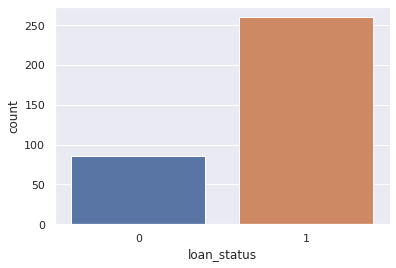

In [39]:
sns.countplot(y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [41]:
from imblearn.over_sampling import RandomOverSampler
smt = RandomOverSampler(random_state=2021)
X_train, y_train = smt.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


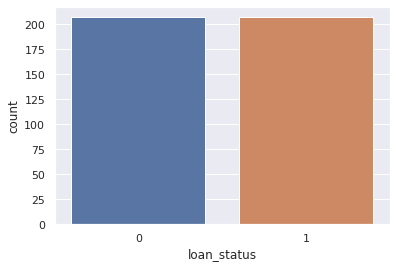

In [42]:
sns.countplot(y_train)

In [43]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_k = knn.predict(X_test)
print("Test set f1 score: ", f1_score(y_test, y_pred_k,average='macro'))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred_k))
confusion_matrix(y_test, y_pred_k)


print(classification_report(y_test, y_pred_k))

Test set f1 score:  0.6316632349576756
Test set Accuracy:  0.6714285714285714
              precision    recall  f1-score   support

           0       0.40      0.71      0.51        17
           1       0.88      0.66      0.75        53

    accuracy                           0.67        70
   macro avg       0.64      0.68      0.63        70
weighted avg       0.76      0.67      0.69        70



# Decision Tree


In [44]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print("Test set f1 score: ", f1_score(y_test, y_pred,average='macro'))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))

Test set f1 score:  0.6389324960753533
Test set Accuracy:  0.6714285714285714
              precision    recall  f1-score   support

           0       0.41      0.76      0.53        17
           1       0.89      0.64      0.75        53

    accuracy                           0.67        70
   macro avg       0.65      0.70      0.64        70
weighted avg       0.78      0.67      0.69        70



# Support Vector Machine


In [45]:

from sklearn import svm
model_svm = svm.SVC(kernel='rbf')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print("Test set f1 score: ", f1_score(y_test, y_pred,average='macro'))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))

Test set f1 score:  0.6761401189689358
Test set Accuracy:  0.7
              precision    recall  f1-score   support

           0       0.44      0.88      0.59        17
           1       0.94      0.64      0.76        53

    accuracy                           0.70        70
   macro avg       0.69      0.76      0.68        70
weighted avg       0.82      0.70      0.72        70



# Logistic Regression


In [46]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print("Test set f1 score: ", metrics.f1_score(y_test, y_pred,average='macro'))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))

Test set f1 score:  0.6761401189689358
Test set Accuracy:  0.7
              precision    recall  f1-score   support

           0       0.44      0.88      0.59        17
           1       0.94      0.64      0.76        53

    accuracy                           0.70        70
   macro avg       0.69      0.76      0.68        70
weighted avg       0.82      0.70      0.72        70



In [47]:
#@title Hyper Parameter Tuning Finding the best values { display-mode: "form" }


In [48]:
pip install optuna

     |████████████████████████████████| 308 kB 6.8 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 209 kB 56.2 MB/s 
     |████████████████████████████████| 75 kB 5.1 MB/s 
     |████████████████████████████████| 149 kB 61.6 MB/s 
     |████████████████████████████████| 112 kB 73.6 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=bb4e9f2678e1d12d57c0b556d84ae2e4a5492e38447e269879aedd2512934957
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [49]:
import optuna

In [50]:
#@title Hyper Parameter tuning for KNN { display-mode: "form" }


In [51]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
    param['algorithm'] = trial.suggest_categorical("algorithm",['auto', 'ball_tree', 'kd_tree', 'brute'])
    param['n_neighbors'] = trial.suggest_int("n_neighbors", 2, 50)
    param['weights'] = trial.suggest_categorical("weights", ['uniform','distance'])
    param['metric'] = trial.suggest_categorical("metric", ['minkowski','euclidean','manhattan'])



    fold=StratifiedKFold(n_splits=5)
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train1, X_test1 = X[train_index], X[test_index]
        y_train1, y_test1 = y[train_index], y[test_index]
        model = KNeighborsClassifier(**param)
    

        model.fit(X_train1,y_train1)
        preds=model.predict(X_test1)

        oof_f1.append(f1_score(y_test1,preds))

    return np.mean(oof_f1)

In [52]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2022-01-24 20:42:55,261] A new study created in memory with name: no-name-cdcd1367-3eff-4a66-860c-9ad01c0ecca8
[I 2022-01-24 20:42:55,303] Trial 0 finished with value: 0.7639800755168664 and parameters: {'algorithm': 'kd_tree', 'n_neighbors': 43, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.7639800755168664.
[I 2022-01-24 20:42:55,336] Trial 1 finished with value: 0.7660066675226966 and parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7660066675226966.
[I 2022-01-24 20:42:55,377] Trial 2 finished with value: 0.7484472034204656 and parameters: {'algorithm': 'auto', 'n_neighbors': 35, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.7660066675226966.
[I 2022-01-24 20:42:55,411] Trial 3 finished with value: 0.7290358126721763 and parameters: {'algorithm': 'auto', 'n_neighbors': 39, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 wi

In [53]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 500
Best trial:
  Value: 0.8416768654641243
  Params: 
    algorithm: ball_tree
    n_neighbors: 3
    weights: uniform
    metric: manhattan


In [54]:
trial.params

{'algorithm': 'ball_tree',
 'metric': 'manhattan',
 'n_neighbors': 3,
 'weights': 'uniform'}

In [55]:
oof_f1=[]
knn_oof_predictions=[]


param = trial.params



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = KNeighborsClassifier(**param)

    model.fit(X_train,y_train)
    preds= model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict(test_X)
    knn_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

err:  0.810344827586207
err:  0.8148148148148148
err:  0.8205128205128206
err:  0.8813559322033898
err:  0.8813559322033898
0.8416768654641243


In [ ]:
#@title HyperParameter tuning for SVM { display-mode: "form" }


In [88]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
    param['C'] = trial.suggest_float("C",0.1,1000.0)
    param['gamma'] = trial.suggest_float("gamma", 0.0001, 10.0)
    param['kernel'] = trial.suggest_categorical("kernel", ["rbf"])


    fold=StratifiedKFold(n_splits=5)
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train2, X_test2 = X[train_index], X[test_index]
        y_train2, y_test2 = y[train_index], y[test_index]
        model = svm.SVC(**param)
    

        model.fit(X_train2,y_train2)
        preds=model.predict(X_test2)

        oof_f1.append(f1_score(y_test2,preds))

    return np.mean(oof_f1)

In [89]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2022-01-24 21:51:32,853] A new study created in memory with name: no-name-8ebc66e5-463c-4f1d-975b-4fd5fa95a2c3
[I 2022-01-24 21:51:32,898] Trial 0 finished with value: 0.7878596239070548 and parameters: {'C': 929.8689287304511, 'gamma': 5.194250734873834, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7878596239070548.
[I 2022-01-24 21:51:32,938] Trial 1 finished with value: 0.7878596239070548 and parameters: {'C': 311.5371326420199, 'gamma': 2.1991875285006954, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7878596239070548.
[I 2022-01-24 21:51:32,984] Trial 2 finished with value: 0.7878596239070548 and parameters: {'C': 450.30019668764413, 'gamma': 2.8310450614642706, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7878596239070548.
[I 2022-01-24 21:51:33,023] Trial 3 finished with value: 0.7878596239070548 and parameters: {'C': 827.1036488091369, 'gamma': 5.634590014203746, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7878596239070548.
[I 2022-01-24 21:51:33,063] Trial 4 fin

In [90]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 500
Best trial:
  Value: 0.8580951090638125
  Params: 
    C: 0.19058419868920495
    gamma: 9.991851655897019
    kernel: rbf


In [91]:
trial.params

{'C': 0.19058419868920495, 'gamma': 9.991851655897019, 'kernel': 'rbf'}

In [63]:
oof_f1=[]
svm_oof_predictions=[]


param = trial.params



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = svm.SVC(**param)

    model.fit(X_train,y_train)
    preds= model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict(test_X)
    svm_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

err:  0.8524590163934427
err:  0.859504132231405
err:  0.859504132231405
err:  0.859504132231405
err:  0.859504132231405
0.8580951090638125


In [64]:
#@title Hyper Parameter tuning for decision tree


In [65]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_class_weight(class_weight='balanced',classes=[0,1],y=y)
classes_weights

array([2.01162791, 0.66538462])

In [66]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
    param['criterion'] = trial.suggest_categorical("criterion",['gini','entropy'])
    param['max_depth'] = trial.suggest_int("max_depth", 1,100)
    param['min_samples_split'] = trial.suggest_float("min_samples_split", 0.0, 1.0)
    param['min_samples_leaf'] = trial.suggest_float("min_samples_leaf", 0.0, 0.5)
    param['max_features'] = trial.suggest_categorical("max_features", ["auto","sqrt","log2"])
    weights = {0:1,1:0.33}
    param['class_weight'] = trial.suggest_categorical("class_weight", ["balanced",weights])
    param['max_leaf_nodes'] = trial.suggest_int("max_leaf_nodes", 2,10)
    #param["min_impurity_decrease"]= trial.suggest_float("min_impurity_decrease", 0.0, 1.0)


    fold=StratifiedKFold(n_splits=5)
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train3, X_test3 = X[train_index], X[test_index]
        y_train3, y_test3 = y[train_index], y[test_index]
        model = DecisionTreeClassifier(**param)
        X_train3, y_train3 = smt.fit_resample(X_train3, y_train3)
    

        model.fit(X_train3,y_train3)
        preds=model.predict(X_test3)

        oof_f1.append(f1_score(y_test3,preds))

    return np.mean(oof_f1)

In [67]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2022-01-24 20:48:53,402] A new study created in memory with name: no-name-c6e067a4-1528-451d-8d8e-ae4e7ce300eb
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 0.33} which is of type dict.

[I 2022-01-24 20:48:53,431] Trial 0 finished with value: 0.23883696780893043 and parameters: {'criterion': 'gini', 'max_depth': 99, 'min_samples_split': 0.8683825603543638, 'min_samples_leaf': 0.1074300059520808, 'max_features': 'sqrt', 'class_weight': {0: 1, 1: 0.33}, 'max_leaf_nodes': 8}. Best is trial 0 with value: 0.23883696780893043.
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains {0: 1, 1: 0.33} which is of type dict.

[I 2022-01-24 20:48:53,456] Trial 1 finished wi

In [68]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 500
Best trial:
  Value: 0.8022203462840712
  Params: 
    criterion: entropy
    max_depth: 62
    min_samples_split: 0.46438110831045015
    min_samples_leaf: 0.029575479918700322
    max_features: auto
    class_weight: balanced
    max_leaf_nodes: 8


In [69]:
trial.params

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 62,
 'max_features': 'auto',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 0.029575479918700322,
 'min_samples_split': 0.46438110831045015}

In [70]:
oof_f1=[]
dct_oof_predictions=[]


param = trial.params



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = DecisionTreeClassifier(**param)

    model.fit(X_train,y_train)
    preds= model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict(test_X)
    dct_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

err:  0.1090909090909091
err:  0.0
err:  0.8045977011494253
err:  0.9811320754716981
err:  0.9719626168224299
0.5733566605068925


In [81]:
#@title HyperParameter tuning for LogisticRegression


In [78]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
    param['solver'] = trial.suggest_categorical("solver", ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    param['C'] = trial.suggest_float("C", 0.0,1)
    param['max_iter'] = trial.suggest_int("max_iter", 100, 2000, 100)


    fold=StratifiedKFold(n_splits=5)
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train4, X_test4 = X[train_index], X[test_index]
        y_train4, y_test4 = y[train_index], y[test_index]
        model = LogisticRegression(**param)

        model.fit(X_train4,y_train4)
        preds=model.predict(X_test4)

        oof_f1.append(f1_score(y_test4,preds))

    return np.mean(oof_f1)

In [79]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2022-01-24 21:17:04,565] A new study created in memory with name: no-name-e5fd3a9c-6f42-4d46-bec0-0778abb24b53
[I 2022-01-24 21:17:04,600] Trial 0 finished with value: 0.7942263752856065 and parameters: {'solver': 'sag', 'C': 0.2691039596715029, 'max_iter': 600}. Best is trial 0 with value: 0.7942263752856065.
[I 2022-01-24 21:17:04,624] Trial 1 finished with value: 0.7843741585368379 and parameters: {'solver': 'sag', 'C': 0.44477144905822774, 'max_iter': 100}. Best is trial 0 with value: 0.7942263752856065.
[I 2022-01-24 21:17:04,642] Trial 2 finished with value: 0.7655193291556927 and parameters: {'solver': 'liblinear', 'C': 0.6461245488348031, 'max_iter': 400}. Best is trial 0 with value: 0.7942263752856065.
[I 2022-01-24 21:17:04,660] Trial 3 finished with value: 0.7823691460055097 and parameters: {'solver': 'liblinear', 'C': 0.8785912307257262, 'max_iter': 600}. Best is trial 0 with value: 0.7942263752856065.
[I 2022-01-24 21:17:04,677] Trial 4 finished with value: 0.7823691460

In [80]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 500
Best trial:
  Value: 0.8580951090638125
  Params: 
    solver: saga
    C: 0.0001536863646910136
    max_iter: 300


In [82]:
trial.params

{'C': 0.0001536863646910136, 'max_iter': 300, 'solver': 'saga'}

In [83]:
oof_f1=[]
lr_oof_predictions=[]


param = trial.params



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LogisticRegression(**param)

    model.fit(X_train,y_train)
    preds= model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict(test_X)
    lr_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

err:  0.8524590163934427
err:  0.859504132231405
err:  0.859504132231405
err:  0.859504132231405
err:  0.859504132231405
0.8580951090638125


In [175]:
modelknn = KNeighborsClassifier(**{'algorithm': 'ball_tree','metric': 'manhattan','n_neighbors': 3,'weights': 'uniform'})
modelsvm = svm.SVC(**{'C': 0.19058419868920495, 'gamma': 9.991851655897019, 'kernel': 'rbf'})
modellr = LogisticRegression(**{'C': 0.0001536863646910136, 'max_iter': 300, 'solver': 'saga'})
modeldtr = DecisionTreeClassifier(**{'class_weight': 'balanced','criterion': 'entropy','max_depth': 62,'max_features': 'auto',
                                      'max_leaf_nodes': 8,'min_samples_leaf': 0.029575479918700322,'min_samples_split': 0.46438110831045015})
from sklearn.ensemble import VotingClassifier
model_vc = VotingClassifier(estimators=[("Knn",modelknn),("svm",modelsvm),("dtr",modeldtr),("lr",modellr)],voting="hard")

oof_f1=[]
fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model_vc.fit(X_train,y_train)
    preds= model_vc.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))


print(np.mean(oof_f1))

err:  0.810344827586207
err:  0.8148148148148148
err:  0.8205128205128206
err:  0.8739495798319328
err:  0.8813559322033898
0.840195594989833


In [158]:
modelknn = KNeighborsClassifier(**{'algorithm': 'ball_tree','metric': 'manhattan','n_neighbors': 3,'weights': 'uniform'})
modelsvm = svm.SVC(**{'C': 0.19058419868920495, 'gamma': 9.991851655897019, 'kernel': 'rbf'})
modellr = LogisticRegression(**{'C': 0.0001536863646910136, 'max_iter': 300, 'solver': 'saga'})
modeldtr = DecisionTreeClassifier(**{'class_weight': 'balanced','criterion': 'entropy','max_depth': 62,'max_features': 'auto',
                                      'max_leaf_nodes': 8,'min_samples_leaf': 0.029575479918700322,'min_samples_split': 0.46438110831045015})
from sklearn.ensemble import StackingClassifier
model_sc = StackingClassifier(estimators=[("Knn",modelknn),("svm",modelsvm),("dtr",modeldtr)],final_estimator=modellr)

oof_f1 =[]
fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model_sc.fit(X_train,y_train)
    preds= model_sc.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))


print(np.mean(oof_f1))

err:  0.8524590163934427
err:  0.859504132231405
err:  0.859504132231405
err:  0.859504132231405
err:  0.859504132231405
0.8580951090638125


# Model Evaluation using Test set


In [176]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


### Load Test set for evaluation


In [205]:
knn_f1 = {"Jaccard":[],"F1_score":[]}
dtr_f1 = {"Jaccard":[],"F1_score":[]}
svm_f1 = {"Jaccard":[],"F1_score":[]}
lr_f1 = {"Jaccard":[],"F1_score":[],"LogLoss":[]}
sc_f1 = {"Jaccard":[],"F1_score":[]}
fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    modelknn.fit(X_train,y_train)
    modeldtr.fit(X_train,y_train)
    modelsvm.fit(X_train,y_train)
    modellr.fit(X_train,y_train)
    model_sc.fit(X_train,y_train)

    knn_pred = modelknn.predict(test_X)
    dtr_pred = modeldtr.predict(test_X)
    svm_pred = modelsvm.predict(test_X)
    lr_pred = modellr.predict(test_X)
    lr_predproba = modellr.predict_proba(test_X)
    sc_pred = model_sc.predict(test_X)

    knn_f1["Jaccard"].append(jaccard_score(test_y,knn_pred))
    knn_f1["F1_score"].append(f1_score(test_y,knn_pred))

    svm_f1["Jaccard"].append(jaccard_score(test_y,svm_pred))
    svm_f1["F1_score"].append(f1_score(test_y,svm_pred))

    dtr_f1["Jaccard"].append(jaccard_score(test_y,dtr_pred))
    dtr_f1["F1_score"].append(f1_score(test_y,dtr_pred))

    lr_f1["Jaccard"].append(jaccard_score(test_y,lr_pred))
    lr_f1["F1_score"].append(f1_score(test_y,lr_pred))
    lr_f1["LogLoss"].append(log_loss(test_y,lr_predproba))

    sc_f1["Jaccard"].append(jaccard_score(test_y,sc_pred))
    sc_f1["F1_score"].append(f1_score(test_y,sc_pred))




In [206]:
report = {0:["KNN",np.mean(knn_f1["Jaccard"]),np.mean(knn_f1["F1_score"])],
          1:["Decision Tree",np.mean(dtr_f1["Jaccard"]),np.mean(dtr_f1["F1_score"])],
          2:["SVM",np.mean(svm_f1["Jaccard"]),np.mean(svm_f1["F1_score"])],
          3:["LogisticRegression",np.mean(lr_f1["Jaccard"]),np.mean(lr_f1["F1_score"]),np.mean(lr_f1["LogLoss"])],
          }

pd_report = pd.DataFrame.from_dict(report,orient='index',columns=["Algorithm","Jaccard","F1-score","LogLoss"])
pd_report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.700209,0.822740,NaN
1,Decision Tree,0.519512,0.682051,NaN
2,SVM,0.740741,0.851064,NaN
3,LogisticRegression,0.740741,0.851064,0.570346


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
